<a href="https://colab.research.google.com/github/sanika-mhadgut/NLP/blob/master/Twitter_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name : Sanika Mhadgut
#Branch : Btech Data Science sem 5
#Roll No: J031

Since it is a supervised learning task we are provided with a training data set which consists of Tweets labeled with “1” or “0” and a test data set without labels. The training and test data sets can be found here.
label “0”: Positive Sentiment
label “1”: Negative Sentiment

Data preprocessing and Feature Engineering


The given data sets are comprised of very much unstructured tweets which should be preprocessed to make an NLP model. In this project, we tried out the following techniques of preprocessing the raw data. But the preprocessing techniques is not limited.
Removal of punctuations.
Removal of commonly used words (stopwords).
Normalization of words.

In [0]:
import pandas as pd
from google.colab import files

In [0]:
data=pd.read_csv("https://raw.githubusercontent.com/zfz/twitter_corpus/master/full-corpus.csv")

Preparing The Test Set


Step A.1: Getting the authentication credentials
Step A.2: Authenticating our Python script
Step A.3: Creating the function to build the Test set

In [0]:
data

,Topic,Sentiment,TweetId,TweetDate,TweetText
0,apple,positive,126415614616154112,Tue Oct 18 21:53:25 +0000 2011,Now all @Apple has to do is get swype on the i...
1,apple,positive,126404574230740992,Tue Oct 18 21:09:33 +0000 2011,@Apple will be adding more carrier support to ...
2,apple,positive,126402758403305474,Tue Oct 18 21:02:20 +0000 2011,Hilarious @youtube video - guy does a duet wit...
3,apple,positive,126397179614068736,Tue Oct 18 20:40:10 +0000 2011,@RIM you made it too easy for me to switch to ...
4,apple,positive,126395626979196928,Tue Oct 18 20:34:00 +0000 2011,I just realized that the reason I got into twi...
...,...,...,...,...,...
5108,twitter,irrelevant,126855687060987904,Thu Oct 20 03:02:07 +0000 2011,me re copè con #twitter
5109,twitter,irrelevant,126855171702661120,Thu Oct 20 03:00:04 +0000 2011,Buenas noches genteeee :) #twitter los quieroo...
5110,twitter,irrelevant,126854999442587648,Thu Oct 20 02:59:23 +0000 2011,#twitter tiene la mala costumbre de ponerce bn...
5111,twitter,irrelevant,126854818101858304,Thu Oct 20 02:58:40 +0000 2011,Oi @flaviasansi. Muito bem vinda ao meu #Twitt...


Punctuations will be always a disturbance in NLP specially hashtags and “@” play a major role in tweets. TextBlob’s word extraction feature from a sentence removes punctuations in an optimal level. The left out punctuations and other unusual notations will be removed in the upcoming preprocessing techniques.

CountVectorization generates a sparse matrix representing all the words in the document.

In [0]:
import nltk

In [0]:
from textblob import TextBlob

In [0]:
data['pre_clean_len'] = [len(t) for t in data.TweetText]

In [0]:
data

,Topic,Sentiment,TweetId,TweetDate,TweetText,pre_clean_len
0,apple,positive,126415614616154112,Tue Oct 18 21:53:25 +0000 2011,Now all @Apple has to do is get swype on the i...,88
1,apple,positive,126404574230740992,Tue Oct 18 21:09:33 +0000 2011,@Apple will be adding more carrier support to ...,76
2,apple,positive,126402758403305474,Tue Oct 18 21:02:20 +0000 2011,Hilarious @youtube video - guy does a duet wit...,121
3,apple,positive,126397179614068736,Tue Oct 18 20:40:10 +0000 2011,@RIM you made it too easy for me to switch to ...,68
4,apple,positive,126395626979196928,Tue Oct 18 20:34:00 +0000 2011,I just realized that the reason I got into twi...,73
...,...,...,...,...,...,...
5108,twitter,irrelevant,126855687060987904,Thu Oct 20 03:02:07 +0000 2011,me re copè con #twitter,23
5109,twitter,irrelevant,126855171702661120,Thu Oct 20 03:00:04 +0000 2011,Buenas noches genteeee :) #twitter los quieroo...,51
5110,twitter,irrelevant,126854999442587648,Thu Oct 20 02:59:23 +0000 2011,#twitter tiene la mala costumbre de ponerce bn...,66
5111,twitter,irrelevant,126854818101858304,Thu Oct 20 02:58:40 +0000 2011,Oi @flaviasansi. Muito bem vinda ao meu #Twitt...,136


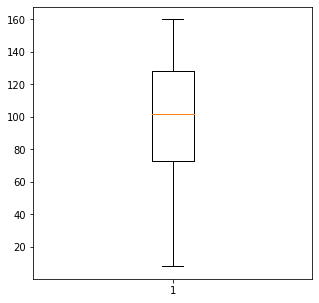

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(data.pre_clean_len)
plt.show()

In [0]:
data['sentiment'] = data['TweetText'].apply(lambda tweet: TextBlob(tweet).sentiment)

In [0]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

data['sentiment'] = data['TweetText'].apply(sentiment_calc)

In [0]:
data

,Topic,Sentiment,TweetId,TweetDate,TweetText,pre_clean_len,sentiment
0,apple,positive,126415614616154112,Tue Oct 18 21:53:25 +0000 2011,Now all @Apple has to do is get swype on the i...,88,0.000000
1,apple,positive,126404574230740992,Tue Oct 18 21:09:33 +0000 2011,@Apple will be adding more carrier support to ...,76,0.500000
2,apple,positive,126402758403305474,Tue Oct 18 21:02:20 +0000 2011,Hilarious @youtube video - guy does a duet wit...,121,0.393750
3,apple,positive,126397179614068736,Tue Oct 18 20:40:10 +0000 2011,@RIM you made it too easy for me to switch to ...,68,0.541667
4,apple,positive,126395626979196928,Tue Oct 18 20:34:00 +0000 2011,I just realized that the reason I got into twi...,73,0.200000
...,...,...,...,...,...,...,...
5108,twitter,irrelevant,126855687060987904,Thu Oct 20 03:02:07 +0000 2011,me re copè con #twitter,23,0.000000
5109,twitter,irrelevant,126855171702661120,Thu Oct 20 03:00:04 +0000 2011,Buenas noches genteeee :) #twitter los quieroo...,51,0.500000
5110,twitter,irrelevant,126854999442587648,Thu Oct 20 02:59:23 +0000 2011,#twitter tiene la mala costumbre de ponerce bn...,66,-0.250000
5111,twitter,irrelevant,126854818101858304,Thu Oct 20 02:58:40 +0000 2011,Oi @flaviasansi. Muito bem vinda ao meu #Twitt...,136,0.000000


In [0]:
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt') 
from sklearn.metrics import confusion_matrix, accuracy_score
from glove import Corpus, Glove

TextBlob is a python library and offers a simple API to access its methods and perform basic NLP tasks. A good thing about TextBlob is that they are just like python strings. So, you can transform and play with it same like we did in python.

In [0]:
#amazon dataset

In [0]:
amazon = pd.read_json('http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Office_Products_5.json.gz', lines=True)

In [0]:
col = amazon['reviewText']
blob = TextBlob(col[0])
for sentence in blob.sentences:
    print(sentence.sentiment.polarity)

0.25
-0.5
0.0
0.0
0.41875
0.19166666666666665
0.0
0.25
0.07500000000000001
0.0


In [0]:
#twitter data

In [0]:
twitter = pd.read_csv('https://raw.githubusercontent.com/zfz/twitter_corpus/master/full-corpus.csv', error_bad_lines=False)
twitter['Sentiment'].unique()

array(['positive', 'negative', 'neutral', 'irrelevant'], dtype=object)

In [0]:
twitter = twitter[twitter['Sentiment'] != "irrelevant"]

In [0]:
twitter['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [0]:
twitter['Sentiment'].value_counts()

neutral     2333
negative     572
positive     519
Name: Sentiment, dtype: int64

In [0]:
def t_blob(sentence):
  textblob = TextBlob(sentence).sentiment
  polarity = textblob.polarity
  if polarity > 0.0:
    return "positive"
  elif polarity == 0.0:
    return "neutral"
  else:
    return "negative"

In [0]:
twitter['text_blob'] = twitter['TweetText'].apply(t_blob, 1)

In [0]:
text_blob_confusion_matrix = confusion_matrix(twitter['Sentiment'], twitter['text_blob'])
text_blob_confusion_matrix

array([[ 234,  171,  167],
       [ 201, 1213,  919],
       [  38,  124,  357]])

In [0]:
textblob_accuracy = accuracy_score(twitter['Sentiment'], twitter['text_blob'])
textblob_accuracy

0.5268691588785047

In [0]:
print(text_blob_confusion_matrix)
print(textblob_accuracy)

[[ 234  171  167]
 [ 201 1213  919]
 [  38  124  357]]
0.5268691588785047


#Using SentimentIntensityAnalyzer

Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [0]:
def sent_nltk(sentence):
  sentiment = SentimentIntensityAnalyzer()
  sentiment_score = sentiment.polarity_scores(sentence)
  if sentiment_score['compound'] > 0.5:
    return 'positive'
  elif sentiment_score['compound'] < 0.5:
    return 'negative'
  else:
    return 'neutral' 

In [0]:
twitter['nltk'] = twitter['TweetText'].apply(sent_nltk,1)
nltk_confusion_matrix = confusion_matrix(twitter['Sentiment'], twitter['nltk'])
nltk_accuracy = accuracy_score(twitter['Sentiment'], twitter['nltk'])

In [0]:
print(nltk_confusion_matrix)
print(nltk_accuracy)

[[ 521    0   51]
 [1968    1  364]
 [ 274    0  245]]
0.2240070093457944


#Using glove

GloVe, coined from Global Vectors, is a model for distributed word representation. The model is an unsupervised learning algorithm for obtaining vector representations for words. This is achieved by mapping words into a meaningful space where the distance between words is related to semantic similarity. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

In [0]:
!pip install glove_python

     |████████████████████████████████| 266kB 2.8MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700320 sha256=ca8b259fd8161eab8d1787c5908aacb43c5be2d26bda85c5b29c26530b5bf305
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


In [0]:
from glove import Corpus, Glove
tokens = col.apply(nltk.word_tokenize)
corpus = Corpus() 
corpus.fit(tokens, window=10)
glove = Glove(no_components=5, learning_rate=0.05)
 
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.most_similar('and')

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


[('pulls', 0.9991609391180112),
 ('despite', 0.9990355587769602),
 ('ripping', 0.9988382622209946),
 ('personal', 0.9986968019768123)]

GloVe can be used to find relations between words like synonyms, company-product relations, zip codes and cities, etc. It is also used by the spaCy model to build semantic word embeddings/feature vectors while computing the top list words that match with distance measures such as Cosine Similarity and Euclidean distance approach.

In [0]:
glove.save('glove.model')

In [0]:
corpus